### Contents

- [Header](#Header)
- [Import Data](#Import-Data)
- [Inspect Data](#Inspect-Data)
- [Create df](#Create-df)
- [Plot Data](#Plot-Data)

### Header

In [21]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# html
from IPython.display import Image
from IPython.core.display import HTML

# web
import json

# others
from tqdm import tqdm
import datetime as dt
#import re
#import os

In [22]:
# file paths

raw_path = '../../data/0_raw/fitrec/' 
input_path = '../../data/1_input/fitrec/'
clean_path = '../../data/2_clean/fitrec/' 
preprocess_path = '../../data/3_preprocess/fitrec/' 
output_path = '../../data/4_output/fitrec/'

sports_path = '../../data/1_input/sports/' 

### Import Data

In [23]:
# import json
# endomondoHR_proper.json contains 167,373 workouts -> too large to open
# endomondoHR_proper_head_xxx.json contains the 1st xxx workouts of endomondoHR_proper.json

#file = 'endomondoHR_proper_head_1000.json'
file = 'endomondoHR_proper_head_10000.json'

path = input_path + file

with open(path, "r") as read_file:
    data = json.load(read_file)

### Inspect Data

In [24]:
# print information of json (workout number 1)

obj = data['1']

for k,v in obj.items():    
    
    if isinstance(v,int):
        print(k,'value:',v)
    else:
        if isinstance(v,list):
            print(k,'size:',len(v))            
        else:
            print(k,'value:',v)            

longitude size: 500
altitude size: 500
latitude size: 500
sport value: bike
id value: 396826535
heart_rate size: 500
gender value: male
timestamp size: 500
url value: https://www.endomondo.com/users/10921915/workouts/396826535
userId value: 10921915
speed size: 500


In [25]:
# gender summary for 1st 10,000 workout records

temp_list = []

for item in data.values():
    #gender_list.append(item)
    #print(item['gender'])
    temp_list.append(item['gender'])
    
temp_set = set(temp_list)

for i in temp_set:
    count = temp_list.count(i)
    print(i,count)

male 9613
unknown 62
female 325


In [26]:
# temp_list = []

# for item in data.values():
#     temp_list.append(item['timestamp'])    
    
# temp_set = set(temp_list)

# for i in temp_set:
#     count = temp_list.count(i)
#     print(i,count)

In [27]:
# print number of workouts by userId

temp_list = []

for item in data.values():
    temp_list.append(item['userId'])
    
temp_set = set(temp_list)

for i in temp_set:
    count = temp_list.count(i)
    print(i,count)

4752000 56
3083777 30
3559941 356
334217 32
430859 107
6361870 23
14066832 770
16786 241
279317 38
4997910 821
1543833 119
6299290 28
11889307 39
9815069 77
4969375 139
12726303 147
903587 45
2020266 15
6539051 104
3905196 155
6194859 34
338866 91
13657138 158
1655221 406
2104631 202
897592 23
10921915 29
4419649 34
5337796 2
4654918 27
2582984 91
1517642 60
13693003 356
7898832 63
5629523 474
7470676 31
885462 222
982359 303
519257 60
407769 188
196571 177
10057948 193
15279967 25
854368 62
90592 27
56291 448
5481957 245
732008 150
13279851 151
3327597 330
5325166 247
3060590 292
1663599 228
22260 65
8467445 443
1081719 22
11258873 37
4007546 426
6479229 1
5971071 235


In [28]:
# print number of workouts by sport

temp_list = []

for item in data.values():
    temp_list.append(item['sport'])
    
temp_set = set(temp_list)

for i in temp_set:
    count = temp_list.count(i)
    print(i,count)

indoor cycling 31
core stability training 6
orienteering 205
kayaking 15
run 4082
skate 1
tennis 1
treadmill running 3
walk 3
bike 4051
weight training 1
elliptical 1
rowing 15
mountain bike 486
soccer 1
cross-country skiing 2
bike (transport) 1093
hiking 3


In [29]:
# describe workout duration (hours)

temp_list = []

for item in data.values():
    temp = item['timestamp']
    diff = temp[-1] - temp[0]
    diff = diff/60/60
    temp_list.append(diff)
    
df_temp = pd.DataFrame(temp_list)
print(df_temp.describe())

#plt.figure(figsize=(20,8))
#sns.lineplot(data=df_temp)

                  0
count  10000.000000
mean       1.490284
std        1.013294
min        0.140556
25%        0.783056
50%        1.147083
75%        1.910347
max        4.995833


### Create df

In [30]:
# create df: workout summary

cols = ['id','userId','gender','timestamp','sport','speed','heart_rate','latitude','longitude','altitude']
df = pd.DataFrame()

In [31]:
# create summary by iterating through jsons

index = 1

for item in data.values():
    
    #print(index)
    
    df.at[index,'id'] = index
    df.at[index,'userId'] = item['userId']
    df.at[index,'gender'] = item['gender']
    df.at[index,'sport'] = item['sport']
    
    timestamp = item['timestamp']
    heart_rate = item['heart_rate']
    latitude = item['latitude']
    longitude = item['longitude']
    altitude = item['altitude']   
    
    df.at[index,'time_start'] = np.min(timestamp)
    df.at[index,'time_end'] = np.max(timestamp)
    df.at[index,'time_dur'] = (np.max(timestamp) - np.min(timestamp))/60
                    
    df.at[index,'lat_start'] = latitude[0]
    df.at[index,'lat_end'] = latitude[-1]
    
    df.at[index,'lon_start'] = longitude[0]
    df.at[index,'lon_end'] = longitude[-1]
                    
    df.at[index,'alt_avg'] = np.mean(altitude)
    df.at[index,'alt_min'] = np.min(altitude)
    df.at[index,'alt_q1'] = np.quantile(altitude,0.25)
    df.at[index,'alt_q3'] = np.quantile(altitude,0.75)
    df.at[index,'alt_max'] = np.max(altitude)
                    
    df.at[index,'hr_avg'] = np.mean(heart_rate)
    df.at[index,'hr_min'] = np.min(heart_rate)
    df.at[index,'hr_q1'] = np.quantile(heart_rate,0.25)
    df.at[index,'hr_q3'] = np.quantile(heart_rate,0.75)
    df.at[index,'hr_max'] = np.max(heart_rate)
    
    if 'speed' in item.keys():
        speed = item['speed']
        
        df.at[index,'spd_avg'] = np.mean(speed)
        df.at[index,'spd_min'] = np.min(speed)
        df.at[index,'spd_q1'] = np.quantile(speed,0.25)
        df.at[index,'spd_q3'] = np.quantile(speed,0.75)
        df.at[index,'spd_max'] = np.max(speed)
                    
    index += 1

In [32]:
print(df.shape)
df.head()

(10000, 26)


,id,userId,gender,sport,time_start,time_end,time_dur,lat_start,lat_end,lon_start,...,hr_avg,hr_min,hr_q1,hr_q3,hr_max,spd_avg,spd_min,spd_q1,spd_q3,spd_max
1,1.0,10921915.0,male,bike,1.408899e+09,1.408906e+09,126.483333,60.173349,60.173354,24.649770,...,152.650,100.0,146.0,160.0,177.0,26.162158,3.8592,19.8972,31.7313,57.4596
2,2.0,10921915.0,male,bike,1.408222e+09,1.408226e+09,74.000000,60.173248,60.173344,24.649855,...,147.710,100.0,140.0,156.0,174.0,27.218369,8.0820,21.8106,31.9257,54.7704
3,3.0,10921915.0,male,bike,1.407858e+09,1.407865e+09,112.483333,60.173262,60.173366,24.649957,...,140.554,99.0,133.0,149.0,168.0,26.050774,0.0000,20.5992,31.0365,59.2092
4,4.0,10921915.0,male,bike,1.407432e+09,1.407437e+09,75.316667,60.173286,60.173303,24.649874,...,147.020,99.0,140.0,155.0,178.0,26.877838,4.3272,21.4848,31.2651,57.9852
5,5.0,10921915.0,male,bike (transport),1.406909e+09,1.406911e+09,22.616667,60.173293,60.183756,24.649798,...,167.154,110.0,164.0,174.0,183.0,NaN,NaN,NaN,NaN,NaN


In [33]:
# Check for nulls in columns

null_cols = df.isnull().sum()
mask_null = null_cols > 0
null_cols[mask_null].sort_values(ascending=False)

spd_max    8094
spd_q3     8094
spd_q1     8094
spd_min    8094
spd_avg    8094
dtype: int64

In [34]:
# mask_userid = df['userId'] == 10921915
# df_temp = df[mask_userid]

In [35]:
# print summary of workout id 1

df.iloc[0]

id                      1
userId        1.09219e+07
gender               male
sport                bike
time_start     1.4089e+09
time_end      1.40891e+09
time_dur          126.483
lat_start         60.1733
lat_end           60.1734
lon_start         24.6498
lon_end           24.6497
alt_avg           43.0712
alt_min              14.6
alt_q1              32.75
alt_q3               52.6
alt_max              74.2
hr_avg             152.65
hr_min                100
hr_q1                 146
hr_q3                 160
hr_max                177
spd_avg           26.1622
spd_min            3.8592
spd_q1            19.8972
spd_q3            31.7313
spd_max           57.4596
Name: 1, dtype: object

In [36]:
# print summary of workout id 1000

df.iloc[999]

id                   1000
userId        4.00755e+06
gender               male
sport                 run
time_start    1.37121e+09
time_end      1.37121e+09
time_dur             54.9
lat_start         53.8009
lat_end           53.8009
lon_start        -2.31902
lon_end          -2.31798
alt_avg          -227.896
alt_min              -258
alt_q1               -253
alt_q3               -205
alt_max              -178
hr_avg            157.078
hr_min                108
hr_q1                 154
hr_q3                 161
hr_max                174
spd_avg               NaN
spd_min               NaN
spd_q1                NaN
spd_q3                NaN
spd_max               NaN
Name: 1000, dtype: object

In [37]:
# save workouts (id 1 and 1000): json to df_temp (for plotting data later)

obj = data['1'] # workout 1
obj_2 = data['1000'] # workout 1000

hr = obj['heart_rate']
hr_2 = obj_2['heart_rate']

cols = ['1','1000']
df_temp = pd.DataFrame(columns=cols)
df_temp['1'] = hr
df_temp['1000'] = hr_2

### Plot Data

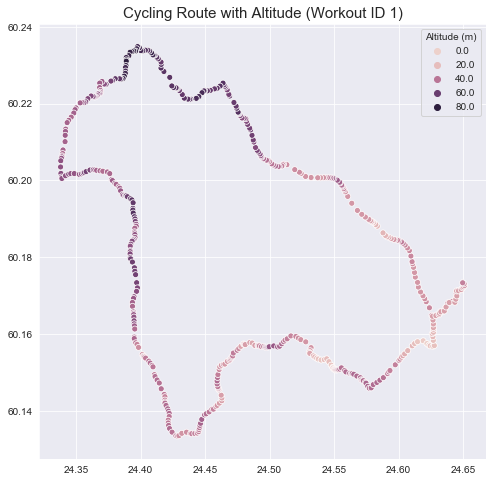

In [38]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=obj,x='longitude',y='latitude',hue='altitude');

plt.title('Cycling Route with Altitude (Workout ID 1)',fontsize=15)
plt.legend(title='Altitude (m)',fontsize=10)

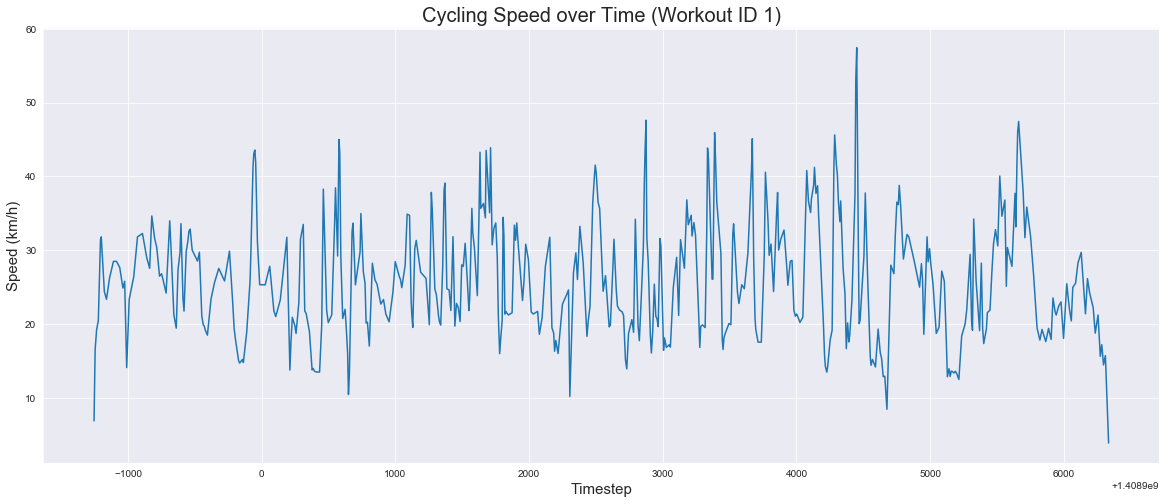

In [39]:
plt.figure(figsize=(20,8))

sns.lineplot(data=obj,x='timestamp',y='speed')

plt.title('Cycling Speed over Timestep (Workout ID 1)',fontsize=20)
plt.xlabel('Timestep',fontsize=15);
plt.ylabel('Speed (km/h)',fontsize=15);

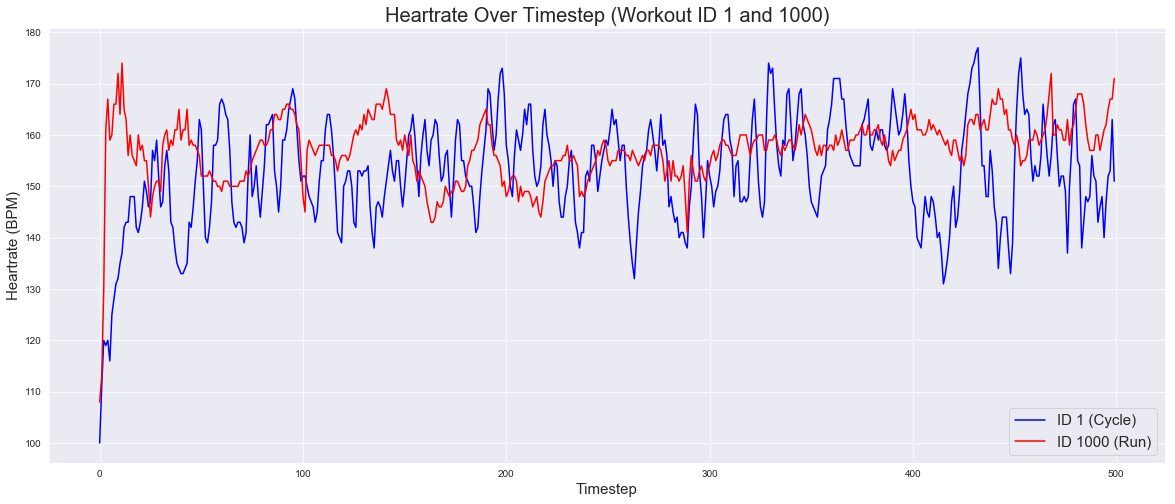

In [40]:
plt.figure(figsize=(20,8))

sns.lineplot(data=df_temp,x=df_temp.index,y='1',color='blue',legend='brief',label='ID 1 (Cycle)');
sns.lineplot(data=df_temp,x=df_temp.index,y='1000',color='red',legend='brief',label='ID 1000 (Run)');

plt.title('Heartrate Over Timestep (Workout ID 1 and 1000)',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Timestep',fontsize=15);
plt.ylabel('Heartrate (BPM)',fontsize=15);